In [25]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nibabel as nib

import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('talk')

import cv2

N_SLIDES  = 176
N_WEIGHTS = 2
N_CASES   = 10
N_ANGLES  = 20

TOT_FILE  = N_SLIDES * N_WEIGHTS * N_CASES * N_ANGLES

def load_dataset():

  filename = os.path.join('~', 'data_NAMIC', 'psnr_ssim_rotate_orig.csv')

  df = pd.read_csv(filename)

  assert len(df) == TOT_FILE

  weights = df['weight'].unique()
  scales  = df['scale'].unique()

  dataframe_list = []
  for w in weights:
    for s in scales:
      w_cond = df['weight'] == w
      s_cond = df['scale'] == s

      dataframe_list.append(df[w_cond & s_cond])

  # order : [t2, 2] [t2, 4] [t1, 2] [t1, 4]
  return [d.reset_index(drop=True) for d in dataframe_list]

def build_filename(case, weight, scale, slide, angle):
  
  root = os.path.join('~', 'data_NAMIC')
  orig = os.path.join(root, 'orig', weight, f'{case}_{weight}.nii') 

  sr = os.path.join(root, weight, f'{case}_{weight}_{scale}lr_bc_gauss_sr', f'sample_{slide:03}_{angle:03}.bin')
  bc = os.path.join(root, weight, f'{case}_{weight}_{scale}lr_bc_gauss_bc', f'sample_{slide:03}.bin')

  return orig, sr, bc

df_x2_t2, df_x4_t2, df_x2_t1, df_x4_t1 = load_dataset()

assert df_x2_t2['weight'].unique() == ['t2']
assert df_x4_t2['weight'].unique() == ['t2']
assert df_x2_t1['weight'].unique() == ['t1']
assert df_x4_t1['weight'].unique() == ['t1']
assert df_x2_t1['scale'].unique() == [2]
assert df_x2_t2['scale'].unique() == [2]
assert df_x4_t1['scale'].unique() == [4]
assert df_x4_t2['scale'].unique() == [4]

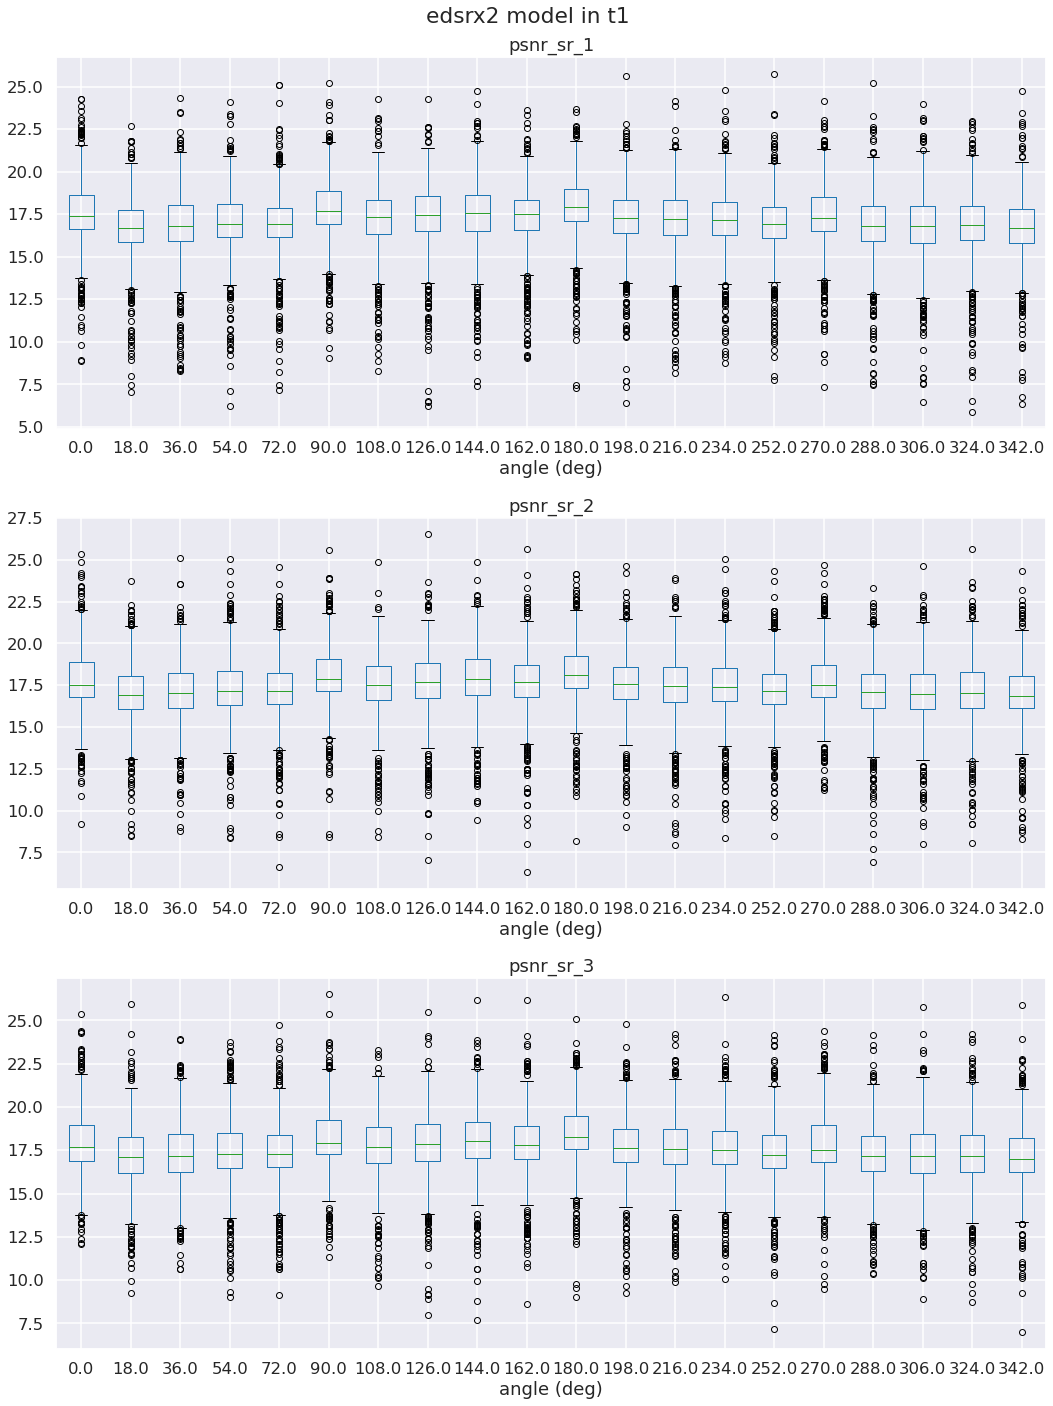

In [74]:
# start from simply x2_t1 for example

dt = df_x2_t1

fig, row = plt.subplots(3, 1, figsize=(15, 20))

for i, ax in enumerate(row) :
  dt.boxplot(ax=ax, column='psnr_sr_{}'.format(i+1), by='angle (deg)')

fig.suptitle('edsrx2 model in t1')

plt.tight_layout()
plt.show()

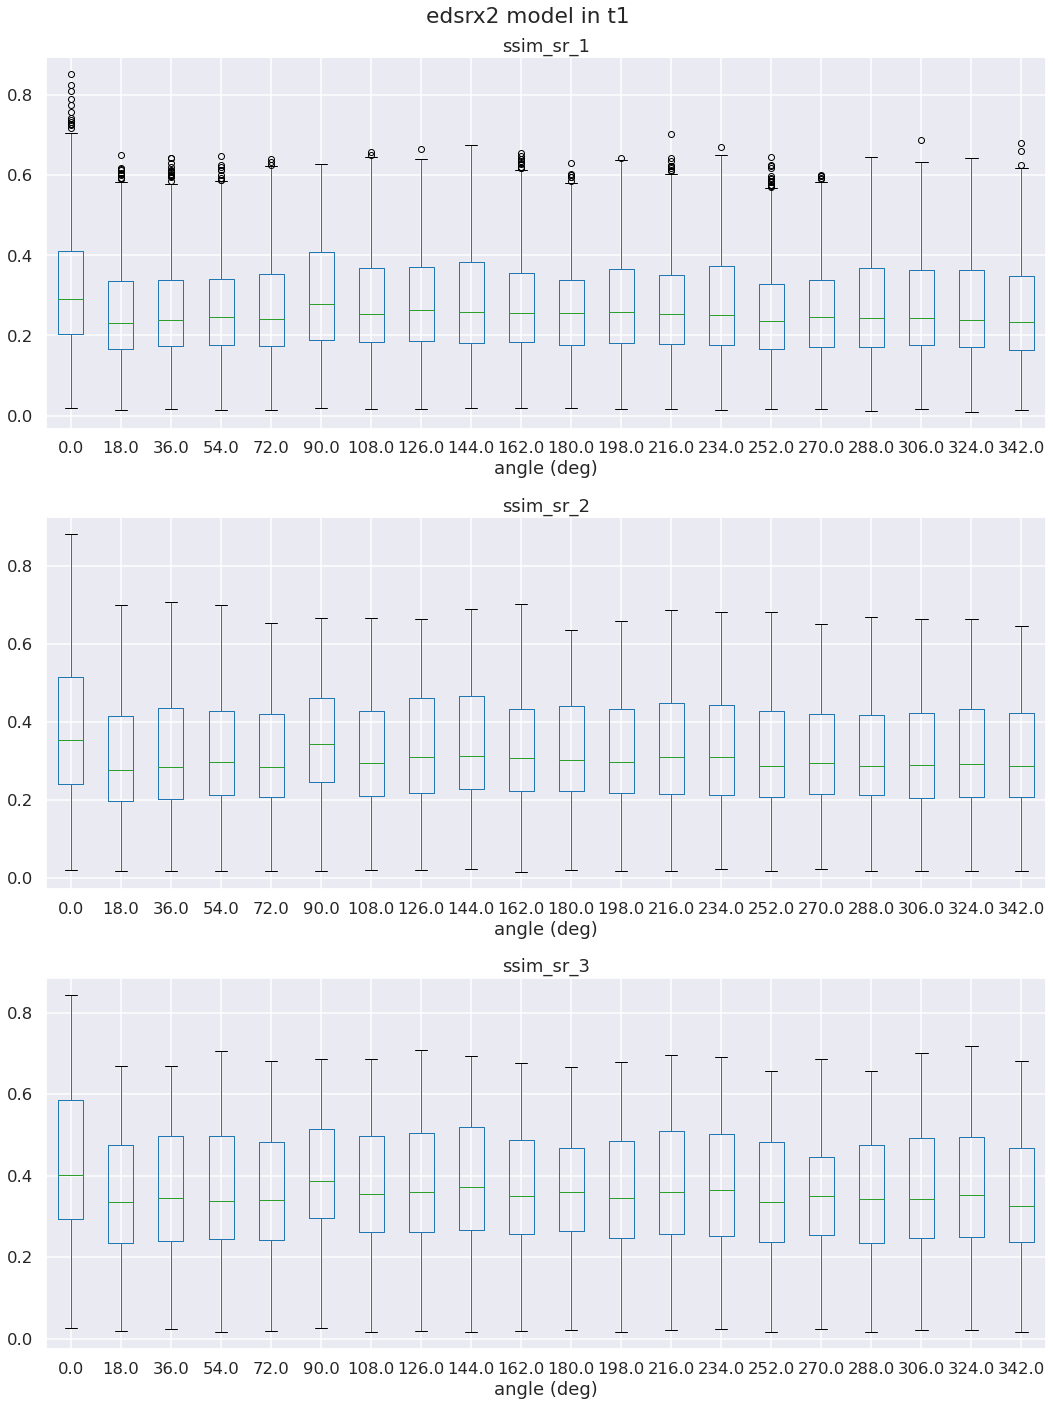

In [27]:
# ssim  boxplotting for edsr and 

dt = df_x2_t1

fig, row = plt.subplots(3, 1, figsize=(15, 20))

for i, ax in enumerate(row) :
  dt.boxplot(ax=ax, column='ssim_sr_{}'.format(i+1), by='angle (deg)')

fig.suptitle('edsrx2 model in t1')
  
plt.tight_layout()
plt.show()

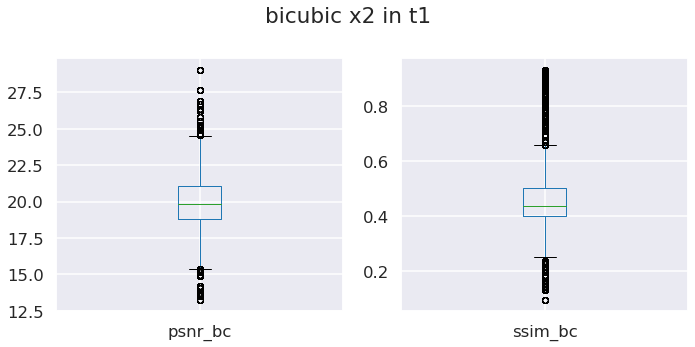

In [115]:
# bc boxplot

dt = df_x2_t1

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))

dt.boxplot(ax=ax1, column='psnr_bc')
dt.boxplot(ax=ax2, column='ssim_bc')

fig.suptitle('bicubic x2 in t1')
  
plt.tight_layout()
plt.show()

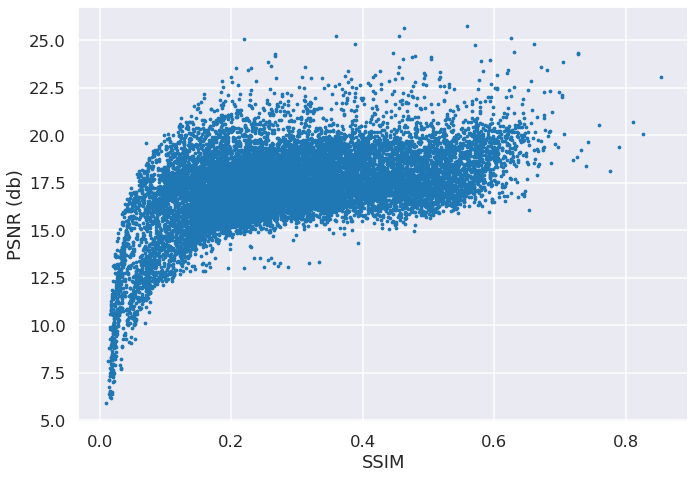

In [75]:
# graph psnr-ssim. The other cases are very different

dt = df_x2_t1

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

dt.plot.scatter(ax=ax, x='ssim_sr_1', y='psnr_sr_1', marker='.')
ax.set_xlabel('SSIM')
ax.set_ylabel('PSNR (db)')

plt.tight_layout()
plt.show()

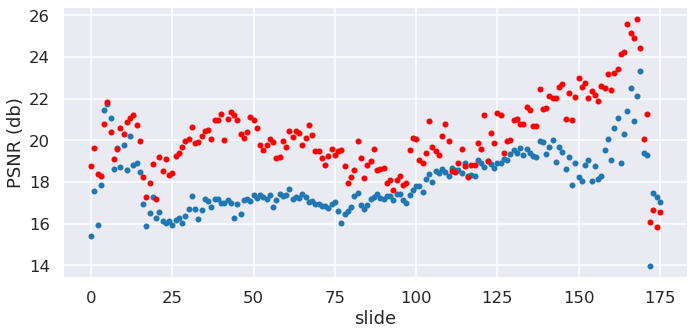

In [108]:
# scatter for value of psnr separated per scale and angle

dt = df_x2_t1

angle_cond = dt['angle (deg)'] == 0.
case_cond  = dt['case'] == 'case01104'

dt = dt[angle_cond & case_cond]

fig, ax = plt.subplots(1,1, figsize=(10, 5))
dt.plot.scatter(x='slide', y='psnr_sr_1', ax=ax)
dt.plot.scatter(x='slide', y='psnr_bc', ax=ax, color='r')

ax.set_ylabel('PSNR (db)')


plt.tight_layout()
plt.show()

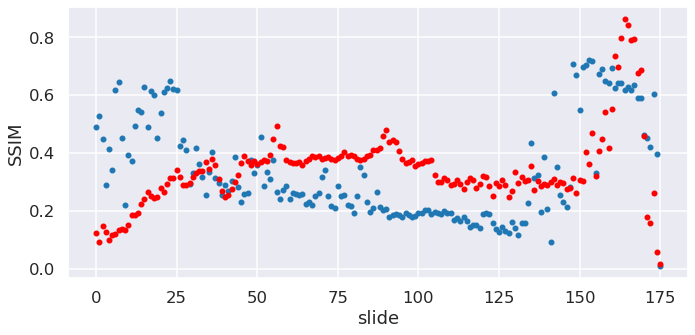

In [112]:
# scatter for value of ssim separated per case and angle

dt = df_x4_t2

angle_cond = dt['angle (deg)'] == 90
case_cond  = dt['case'] == 'case01011'

dt = dt[angle_cond & case_cond]

fig, ax = plt.subplots(1,1, figsize=(10, 5))
dt.plot.scatter(x='slide', y='ssim_sr_1', ax=ax)
dt.plot.scatter(x='slide', y='ssim_bc', ax=ax, color='r')

ax.set_ylabel('SSIM')

plt.tight_layout()
plt.show()